In [1]:
# Importing required module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.filterwarnings('ignore');

In [2]:
# Reading Data
darts = pd.read_csv("D:\Ravi_Data\darts.csv",sep=",")
print('Observations per class:\n',darts['competitor'].value_counts())
darts.head()

Observations per class:
 Steve      200
Kate       200
Susan      200
Michael    200
Name: competitor, dtype: int64


,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [3]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [4]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)


# Assign a number to each category (label encoding)
import importlib; importlib.reload(pd)

cat_dict = dict(enumerate(darts.competitor.cat.categories))

darts.competitor = darts.competitor.cat.codes


# # Import to_categorical from keras utils module
from keras.utils import to_categorical

X = darts.drop(['competitor'], axis=1)
# # # Use to_categorical on your labels

y = to_categorical(darts.competitor)
# # # Now print the one-hot encoded labels
# # print('One-hot encoded competitors: \n',y)

In [5]:
# loading sciki learn libraries and spliting data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify =y,shuffle=True,random_state = 111)


In [6]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
early_stop = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint('D:\Ravi_Data\weights.hdf5', monitor='val_loss', save_best_only = True)

# Fit your model to the training data for 200 epochs
details = model.fit(X_train,y_train,epochs=500,validation_split =0.2 ,callbacks = [early_stop,checkpoint],
                    batch_size =32,verbose = False)


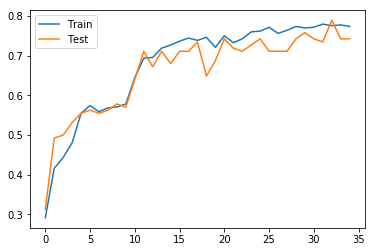

In [7]:
plt.plot(details.history['accuracy'])
plt.plot(details.history['val_accuracy'])       
plt.legend(['Train','Test'])
plt.show() 

In [8]:
model.load_weights('D:\Ravi_Data\weights.hdf5')
# Evaluate your model accuracy on the test data
accuracy = model.evaluate(X_test,y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

5/5 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.7563
Accuracy: 0.7562500238418579


In [9]:
preds = model.predict(X_test)

preds_chosen = [np.argmax(pred) for pred in preds]
pred_category = [cat_dict[k] for k in preds_chosen]

for i,pred in enumerate(preds_chosen):
    print("{:25} | {}".format(pred,y_test[i]))

                        3 | [0. 0. 0. 1.]
                        1 | [0. 1. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        0 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        0 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        2 | [0. 0. 1. 0.]
                        2 | [0. 0. 1. 0.]
                        1 | [0. 1. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        0 | [0. 0. 1. 0.]
                        1 | [0. 1. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        1 | [0. 1. 0. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        2 | [0. 0. 1. 0.]
                        1 | [0. 1. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        2 | [1. 0. 0. 0.]
                        0 | [1. 0. 0. 0.]
                        3 | [1. 0.

In [10]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 1, 2, 0, 3, 3, 0, 3, 2, 2, 1, 2, 0, 1, 2, 1, 3, 3, 2, 1, 2, 2,
       0, 3, 3, 2, 1, 1, 2, 3, 3, 3, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 1, 1, 2, 3, 0, 3, 1, 3, 1, 0,
       2, 1, 3, 2, 2, 3, 3, 0, 1, 2, 3, 1, 3, 2, 0, 1, 1, 3, 0, 1, 0, 2,
       0, 3, 2, 1, 3, 3, 1, 3, 2, 1, 1, 2, 3, 1, 2, 2, 3, 1, 0, 1, 0, 2,
       1, 1, 3, 3, 3, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 3, 2, 0, 2,
       3, 3, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 1, 3, 1, 3, 2, 0, 3, 0, 1, 1,
       0, 0, 2, 1, 1, 2], dtype=int64)